# Spotify - Data analysis

## Importing libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/Users/adriennficsor/Desktop/Turing/M4S2/spotifytoptracks.csv", index_col=0)
#review the dataset:
df.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


## Data cleaning
### General overview of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)
memory usage: 6.

#### Missing values

In [4]:
df.isnull().any()

artist              False
album               False
track_name          False
track_id            False
energy              False
danceability        False
key                 False
loudness            False
acousticness        False
speechiness         False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
genre               False
dtype: bool

Checking with two different methods, there are no missing values.

#### Duplicate values

In [5]:
duplicates = df.duplicated().any()
duplicates

False

There are no duplicate values.

### General statistics

In [6]:
stats = df.describe().transpose()
stats

,count,mean,std,min,25%,50%,75%,max
energy,50.0,0.609300,0.154348,0.22500,0.494000,0.59700,0.72975,0.855
danceability,50.0,0.716720,0.124975,0.35100,0.672500,0.74600,0.79450,0.935
key,50.0,5.720000,3.709007,0.00000,2.000000,6.50000,8.75000,11.000
loudness,50.0,-6.225900,2.349744,-14.45400,-7.552500,-5.99150,-4.28550,-3.280
acousticness,50.0,0.256206,0.265250,0.00146,0.052800,0.18850,0.29875,0.934
speechiness,50.0,0.124158,0.116836,0.02900,0.048325,0.07005,0.15550,0.487
instrumentalness,50.0,0.015962,0.094312,0.00000,0.000000,0.00000,0.00002,0.657
liveness,50.0,0.196552,0.176610,0.05740,0.093950,0.11100,0.27125,0.792
valence,50.0,0.555710,0.216386,0.06050,0.434000,0.56000,0.72625,0.925
tempo,50.0,119.690460,25.414778,75.80100,99.557250,116.96900,132.31700,180.067


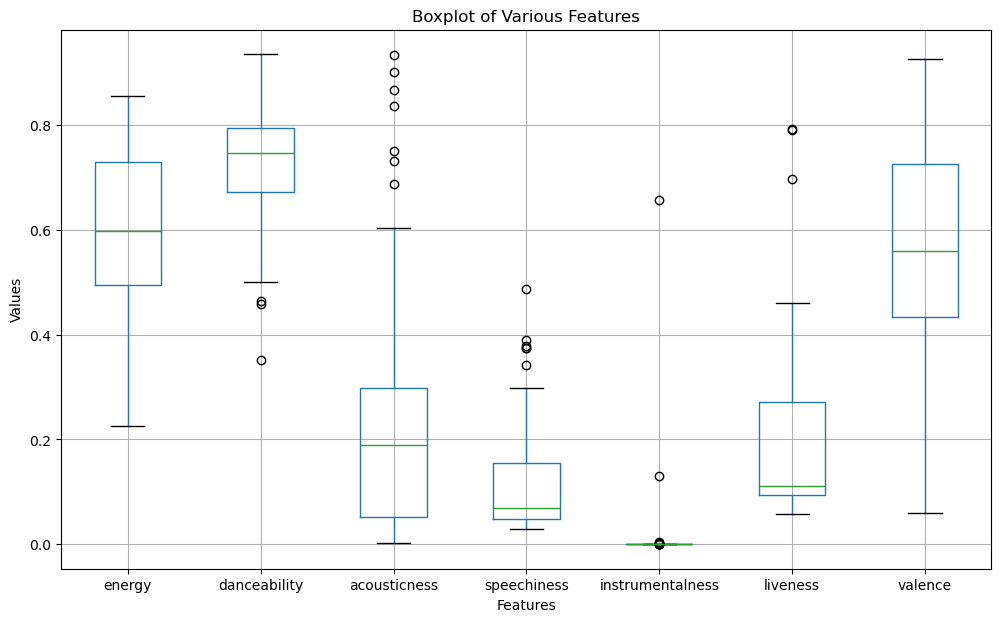

In [7]:
df.boxplot(column = ["energy", "danceability", "acousticness", "speechiness", "instrumentalness", "liveness", "valence"], figsize=(12, 7))
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of Various Features")
plt.show()

Outliers: not to be removed, as the dataset is very small, and the outliers can also have importance.
We already have some insights:
Most popular songs have high energy, danceability and valence. 
Instrumentalness is close to 0.

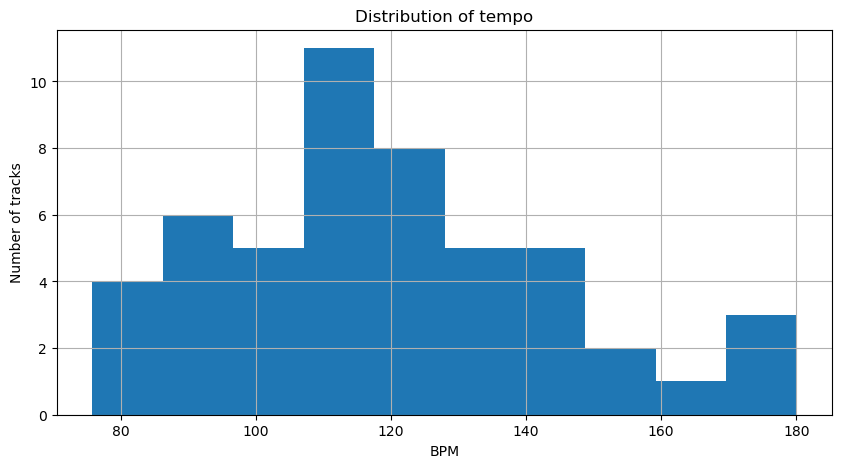

In [36]:
df.hist(column="tempo", figsize=(10,5))
plt.xlabel("BPM")
plt.ylabel("Number of tracks")
plt.title("Distribution of tempo")
plt.show()

Majority of the songs are located around the 120 BPM mark.

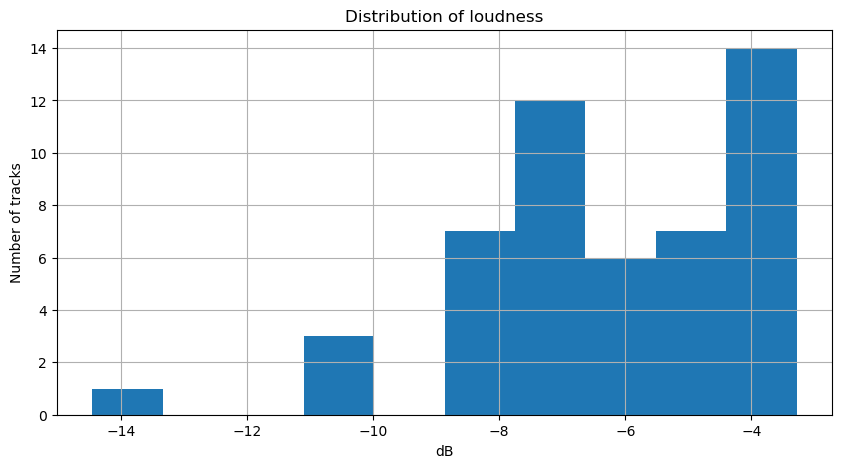

In [37]:
df.hist(column="loudness", figsize=(10,5))
plt.xlabel("dB")
plt.ylabel("Number of tracks")
plt.title("Distribution of loudness")
plt.show()

Most of the songs are closer to the louder end of the scale, the highest number appears as the loudest in this dataset.

## Exploratory data analysis
#### Artists that have more than 1 popular track


In [10]:
# counting the track numbers by artists
track_count = df.groupby("artist")["track_id"].count()
# applying filter and sort descending
popular_artists = track_count[track_count > 1].sort_values(ascending = False)
popular_artists

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Harry Styles     2
Justin Bieber    2
Lewis Capaldi    2
Post Malone      2
Name: track_id, dtype: int64

There are 7 artists with more than one popular song.

#### The most popular artist(s)

In [11]:
top_artists = track_count[track_count == track_count.max()]
top_artists

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Name: track_id, dtype: int64

#### Artists in total having their songs in the top 50

In [12]:
artist_count = df.artist.nunique()
artist_count

40

In total there are 40 artists in the Top50 hist list.

#### Albums that have more than 1 popular track

In [13]:
# counting tracks by artists
track_count_album = df.groupby(["artist", "album"])["track_id"].count()
# applying filter
popular_albums = track_count_album[track_count_album > 1].sort_values(ascending = False)
popular_albums

artist         album               
Dua Lipa       Future Nostalgia        3
Harry Styles   Fine Line               2
Justin Bieber  Changes                 2
Post Malone    Hollywood's Bleeding    2
Name: track_id, dtype: int64

#### Albums in total having their songs in the top 50

In [14]:
album_count = df.album.nunique()
album_count

45

#### Tracks having a danceability score above 0.7

In [15]:
high_danceability = df.loc[df["danceability"] > 0.7, ["artist", "track_name", "danceability"]]
high_danceability

,artist,track_name,danceability
1,Tones And I,Dance Monkey,0.825
2,Roddy Ricch,The Box,0.896
3,SAINt JHN,Roses - Imanbek Remix,0.785
4,Dua Lipa,Don't Start Now,0.793
5,DaBaby,ROCKSTAR (feat. Roddy Ricch),0.746
7,Powfu,death bed (coffee for your head),0.726
8,Trevor Daniel,Falling,0.784
10,KAROL G,Tusa,0.803
13,Lil Mosey,Blueberry Faygo,0.774
14,Justin Bieber,Intentions (feat. Quavo),0.806


Having a mean of 0.72 it is expected to have majority of the tracks above 0.7 (in general there are higher danceability scores)

#### Tracks having a danceability score below 0.4

In [16]:
low_danceability = df.loc[df["danceability"] < 0.4, ["artist", "track_name", "danceability"]]
low_danceability

,artist,track_name,danceability
44,Billie Eilish,lovely (with Khalid),0.351


#### Tracks having their loudness above -5

In [17]:
loud_high = df.loc[df["loudness"] > -5, ["artist", "track_name", "loudness"]]
loud_high

,artist,track_name,loudness
4,Dua Lipa,Don't Start Now,-4.521
6,Harry Styles,Watermelon Sugar,-4.209
10,KAROL G,Tusa,-3.280
12,Post Malone,Circles,-3.497
16,Lewis Capaldi,Before You Go,-4.858
17,Doja Cat,Say So,-4.577
21,Harry Styles,Adore You,-3.675
23,24kGoldn,Mood (feat. iann dior),-3.558
31,Dua Lipa,Break My Heart,-3.434
32,BTS,Dynamite,-4.410


#### Tracks having their loudness below -8

In [18]:
loud_low = df.loc[df["loudness"] < -8, ["artist", "track_name", "loudness"]]
loud_low

,artist,track_name,loudness
7,Powfu,death bed (coffee for your head),-8.765
8,Trevor Daniel,Falling,-8.756
15,Drake,Toosie Slide,-8.820
20,Jawsh 685,Savage Love (Laxed - Siren Beat),-8.520
24,Billie Eilish,everything i wanted,-14.454
26,Billie Eilish,bad guy,-10.965
36,Travis Scott,HIGHEST IN THE ROOM,-8.764
44,Billie Eilish,lovely (with Khalid),-10.109
47,JP Saxe,If the World Was Ending - feat. Julia Michaels,-10.086


There are much less quieter songs, than loud songs among the top.

#### The longest track

In [19]:
# calculation in minutes to show as the result
df["duration"]= ((df["duration_ms"] / 60000).round(2))
max_duration = df["duration_ms"].max()
longest_song = df.loc[df["duration_ms"] == max_duration, ["artist", "track_name", "duration"]]
longest_song

,artist,track_name,duration
49,Travis Scott,SICKO MODE,5.21


#### The shortest track

In [20]:
min_duration = df["duration_ms"].min()
shortest_song = df.loc[df["duration_ms"] == min_duration, ["artist", "track_name", "duration"]]
shortest_song

,artist,track_name,duration
23,24kGoldn,Mood (feat. iann dior),2.34


The longest track is more than 2x as long as the shortest track.

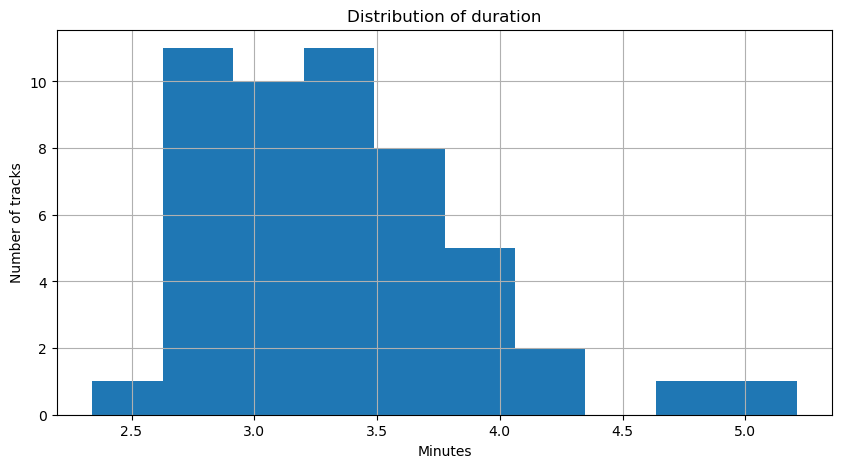

In [39]:
df.hist(column="duration", figsize=(10,5))
plt.xlabel("Minutes")
plt.ylabel("Number of tracks")
plt.title("Distribution of duration")
plt.show()

#### Most instrumental track (outlier)

In [22]:
max_instruments = df["instrumentalness"].max()
instrumental_song = df.loc[df["instrumentalness"] == max_instruments, ["artist", "track_name", "instrumentalness", "genre"]]
instrumental_song

,artist,track_name,instrumentalness,genre
24,Billie Eilish,everything i wanted,0.657,Pop


#### Artist with the highest energy songs

In [23]:
energy_mean = df.groupby("artist")["energy"].mean()
max_energy = energy_mean[energy_mean == energy_mean.max()]
max_energy

artist
Lady Gaga    0.855
Name: energy, dtype: float64

Lady Gaga has the highest energy song on average (only one song).

### Genre distribution

In [24]:
genre_count = df["genre"].value_counts()
genre_count

genre
Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
R&B/Soul                               2
 Electro-pop                           2
Nu-disco                               1
R&B/Hip-Hop alternative                1
Pop/Soft Rock                          1
Pop rap                                1
Hip-Hop/Trap                           1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Alternative/reggaeton/experimental     1
Chamber pop                            1
Name: count, dtype: int64

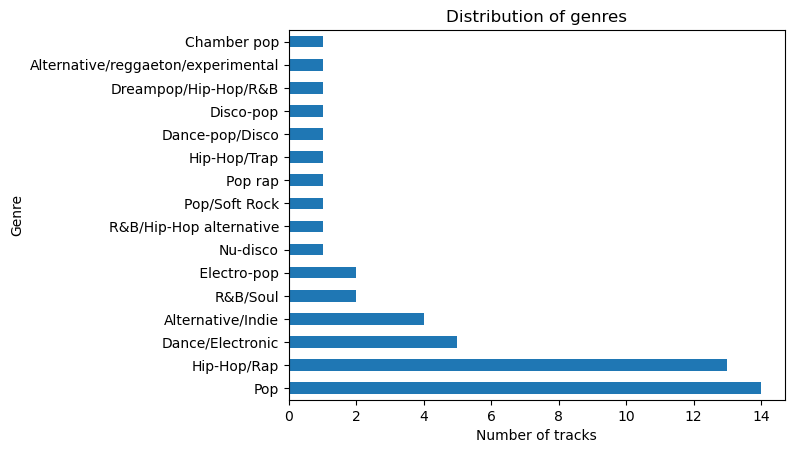

In [44]:
genre_count.plot.barh()
plt.xlabel("Number of tracks")
plt.ylabel("Genre")
plt.title("Distribution of genres")
plt.show()

#### The most popular genre

In [25]:
popular_genre = genre_count[genre_count == genre_count.max()]
popular_genre

genre
Pop    14
Name: count, dtype: int64

#### Genres having just one song on the top 50

In [42]:
one_song = genre_count[genre_count == 1]
one_song

genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64

#### Genres in total that are represented in the top 50

In [27]:
genres = df["genre"].nunique()
genres

16

### Features that are strongly positively / negatively correlated

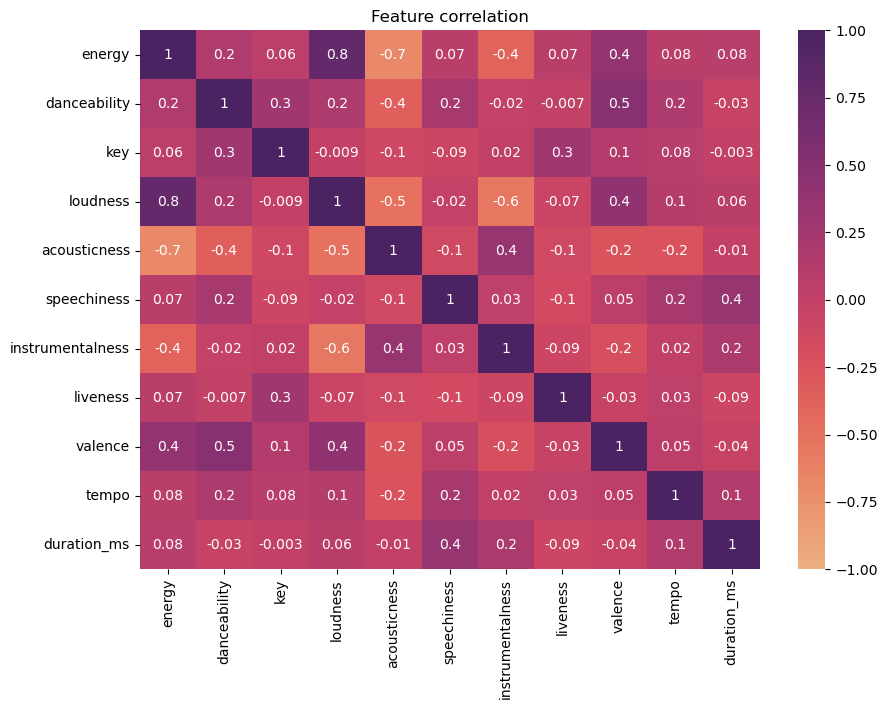

In [45]:
corr = df.drop(["artist","album","track_name","track_id","genre","duration"], axis=1).corr()
plt.figure(figsize=(10,7))
heatmap = sns.heatmap(corr, annot=True, fmt=".1g", vmin=-1, vmax=1, cmap="flare")
plt.title("Feature correlation")
plt.show()

Strong positive correlation: loudness - energy, valence - danceability
Strong negative correlation: acousticness - energy, instrumentalness - loudness
No correlation: danceability - liveness,
                key - loudness,
                key - duration

#### Danceability score distribution between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres

In [30]:
filtered_df = df[df["genre"].isin(["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"])]
dance_genres = filtered_df.groupby("genre")["danceability"].mean()
dance_genres

genre
Alternative/Indie    0.661750
Dance/Electronic     0.755000
Hip-Hop/Rap          0.765538
Pop                  0.677571
Name: danceability, dtype: float64

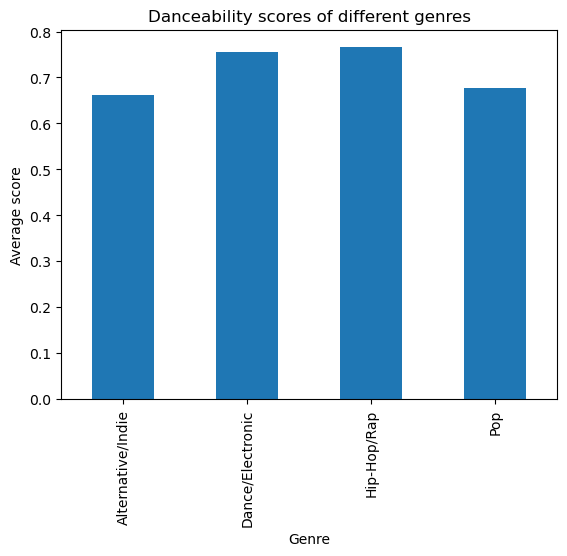

In [46]:
dance_genres.plot.bar()
plt.xlabel("Genre")
plt.ylabel("Average score")
plt.title("Danceability scores of different genres")
plt.show()

Hip-hop/Rap has the highest ascore, closely followed by Dance/Electronic. 
Pop and alternative are also close to each other, but a bit lower than the first 2 genres.

#### Loudness score distribution between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres

In [32]:
filtered_df = df[df["genre"].isin(["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"])]
loud_genres = filtered_df.groupby("genre")["loudness"].mean()
loud_genres

genre
Alternative/Indie   -5.421000
Dance/Electronic    -5.338000
Hip-Hop/Rap         -6.917846
Pop                 -6.460357
Name: loudness, dtype: float64

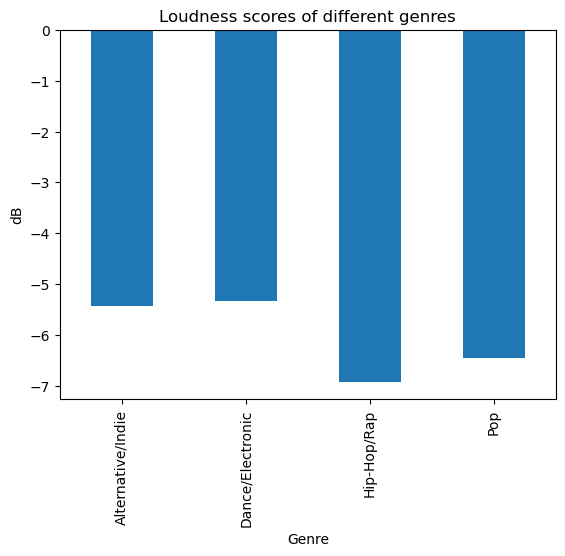

In [47]:
loud_genres.plot.bar()
plt.xlabel("Genre")
plt.ylabel("dB")
plt.title("Loudness scores of different genres")
plt.show()

Dance/Electronic and Alternative/Indie are almost equally the loudest genres. 
Hip-Hop/Rap genre is the most quiet out of these categories.

#### Acousticness score distribution between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres

In [34]:
filtered_df = df[df["genre"].isin(["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"])]
acoustic_genres = filtered_df.groupby("genre")["acousticness"].mean()
acoustic_genres

genre
Alternative/Indie    0.583500
Dance/Electronic     0.099440
Hip-Hop/Rap          0.188741
Pop                  0.323843
Name: acousticness, dtype: float64

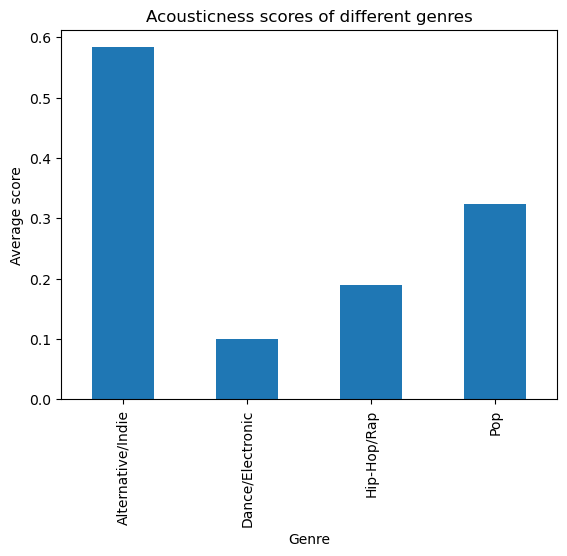

In [48]:
acoustic_genres.plot.bar()
plt.xlabel("Genre")
plt.ylabel("Average score")
plt.title("Acousticness scores of different genres")
plt.show()

Alternative/Indie genre is significantly more acoustic than other genres.
Dance/Electronic genre is the least acoustic genre.
In general there are bigger differences in the genre scores than in other categories.

## Summary

- Most popular genres are Pop and Hip-Hop/Rap
- Most popular songs have high energy, danceability and valence
- The average song tempo is around 120 BPM
- Out of 40 artists the most popular ones are: Billie Eilish, Dua Lipa and Travis Scott
- The most popular album has 3 tracks in the list: Dua Lipa - Future Nostalgia
- The average duration of the songs is about 3.3 minutes
- There is strong positive correlation: energy - loudness, danceability - valence (to create a high energy, danceable song, it has to be loud and upbeat)
- There is strong negative correlation between energy - acousticness (having acountic songs is less likely to generate a hit)
